In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data=pd.read_csv('mnist_train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) #shuffle the data before splitting into training sets

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev/255

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train/255
_,m_train = x_train.shape

In [3]:
def init_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1,b1,W2,b2

def Relu(z):
    return np.maximum(z, 0)

def softmax(z):
    A = np.exp(z)/sum(np.exp(z))
    return A

def forward_propagation(W1,b1,W2,b2,X):
    z1 = W1.dot(X) + b1
    A1 = Relu(z1)
    z2 = W2.dot(A1) + b2
    A2 = softmax(z2)
    return z1,A1,z2,A2

def Relu_derivative(z):
    return z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_propagation(z1,A1,z2,A2,W1,W2,X,Y):
    one_hot_Y = one_hot(Y)
    dz2 = A2 - one_hot_Y
    dW2 = 1 / m * dz2.dot(A1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = W2.T.dot(dz2) * Relu_derivative(z1)
    dW1 = 1 / m * dz1.dot(X.T)
    db1 = 1 / m * np.sum(dz1)
    return dW1,db1,dW2,db2

def update_parameters(W1,b1,W2,b2,dW1,db1,dW2,db2,a):
    W1 = W1 - a*dW1
    b1 = b1 - a*db1
    W2 = W2 - a*dW2
    b2 = b2 - a*db2
    return W1,b1,W2,b2

In [4]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, a, iterations):
    W1, b1, W2, b2 = init_parameters()
    for i in range(iterations):
        z1, A1, z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(z1, A1, z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, a)
        if i % 200 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy:",get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.1, 3200)

Iteration:  0
[5 3 3 ... 3 3 5] [1 7 9 ... 9 9 0]
Accuracy: 0.09364406779661016
Iteration:  200
[1 9 7 ... 7 9 0] [1 7 9 ... 9 9 0]
Accuracy: 0.7577627118644068
Iteration:  400
[1 9 7 ... 7 9 0] [1 7 9 ... 9 9 0]
Accuracy: 0.8309322033898305
Iteration:  600
[1 9 7 ... 7 9 0] [1 7 9 ... 9 9 0]
Accuracy: 0.8540338983050847
Iteration:  800
[1 9 7 ... 7 9 0] [1 7 9 ... 9 9 0]
Accuracy: 0.8665593220338983
Iteration:  1000
[1 9 7 ... 7 9 0] [1 7 9 ... 9 9 0]
Accuracy: 0.8748474576271187
Iteration:  1200
[1 9 7 ... 7 9 0] [1 7 9 ... 9 9 0]
Accuracy: 0.8804915254237288
Iteration:  1400
[1 9 7 ... 7 9 0] [1 7 9 ... 9 9 0]
Accuracy: 0.8846610169491526
Iteration:  1600
[1 9 9 ... 7 9 0] [1 7 9 ... 9 9 0]
Accuracy: 0.888
Iteration:  1800
[1 9 9 ... 7 9 0] [1 7 9 ... 9 9 0]
Accuracy: 0.8912372881355932
Iteration:  2000
[1 9 9 ... 7 9 0] [1 7 9 ... 9 9 0]
Accuracy: 0.8940338983050847
Iteration:  2200
[1 9 9 ... 7 9 0] [1 7 9 ... 9 9 0]
Accuracy: 0.8959491525423728
Iteration:  2400
[1 9 9 ... 7 9 0] 

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


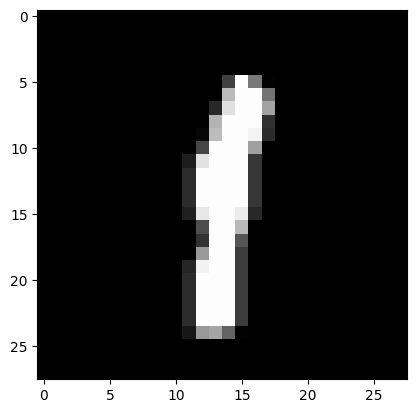

Prediction:  [2]
Label:  2


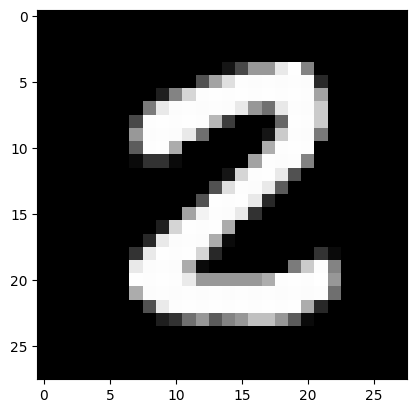

Prediction:  [2]
Label:  2


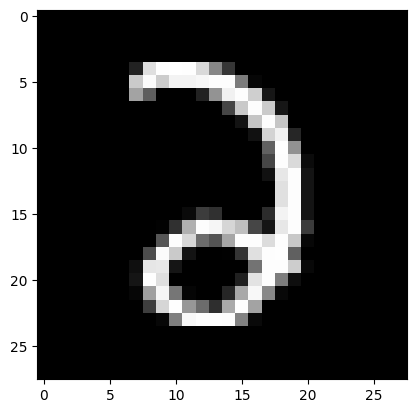

Prediction:  [5]
Label:  5


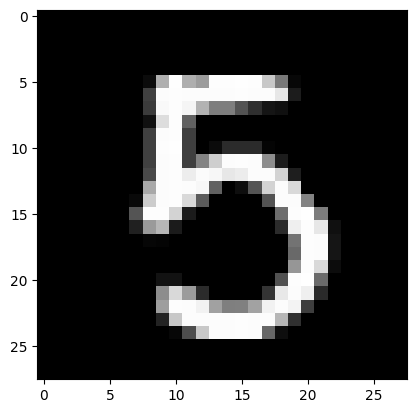

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(101, W1, b1, W2, b2)
test_prediction(212, W1, b1, W2, b2)
test_prediction(374, W1, b1, W2, b2)